# COURSE: Master statistics and machine learning: Intuition, Math, code
##### COURSE URL: udemy.com/course/statsml_x/?couponCode=202006 
## SECTION: The t-test family
### VIDEO: One-sample t-test
#### TEACHER: Mike X Cohen, sincxpress.com

In [1]:
# import libraries
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

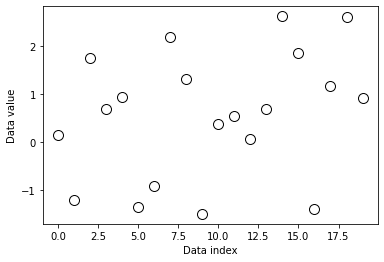

In [2]:
## generate the data

# parameters
N = 20  # sample size
popMu = .5 # true population mean
data  = np.random.randn(N) + popMu

# let's see what the data look(s) like
plt.plot(data,'ko',markerfacecolor='w',markersize=10)
plt.xlabel('Data index')
plt.ylabel('Data value')
plt.show()

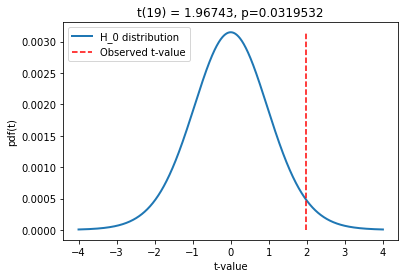

In [3]:
## "manual" t-test

# the null-hypothesis value
H0val = 0

# compute the t-value
t_num = np.mean(data) - H0val
t_den = np.std(data, ddof=1) / np.sqrt(N)
tval = t_num / t_den

# degrees of freedom
df = N-1

# p-value
pval = 1-stats.t.cdf(abs(tval),df)

# show the H0 parameter distribution and observed t-value
x = np.linspace(-4,4,1001)
tdist = stats.t.pdf(x,df) * np.mean(np.diff(x))

plt.plot(x,tdist,linewidth=2)
plt.plot([tval,tval],[0,max(tdist)],'r--')
plt.legend(('H_0 distribution','Observed t-value'))
plt.xlabel('t-value')
plt.ylabel('pdf(t)')
plt.title('t(%g) = %g, p=%g'%(df,tval,pval))
plt.show()

In [5]:
## now using the Python function

t,p = stats.ttest_1samp(data,H0val)

print(t,p)
# do these values match our manually computed values? : No
# This function compute two-tailed T-test
print('%g %g'%(pval*2, p))

1.9674347774872054 0.06390641415969689
0.0639064 0.0639064
